# COVID-19 Auswertung - WHO - new cases, deaths

## import libraries

In [65]:
Programm_Name = "WHO" # 04.01.2021 - Time Series Impffdaten erstellen

### Speicherorte und Dateinamen Plots

In [66]:
Laufwerk = "D:\\"
name_output_df = 'Dataframes\\data_WHO_data.csv'

pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"
name_performance = 'Dataframes\\df_performance.csv'

name_1_1 = "plot_1-1_cases_absolute numbers.png" # cases absoulte zahlen EU
name_1_2 = "plot_1-2_cases.png" # cases pro 100.000 Einwohner EU 
name_2 = "plot_2_intensiv.png" # intensiv Deutschland
name_2_2 = "plot_2_2_intensiv_gesamt.png" # intensiv Deutschland covid und nicht covid
name_2_3 = "plot_2_3_intensiv_covid-19.png" # intensiv Deutschland covid
name_3_1 = "plot_3-1_deaths_absolute numbers.png" # deaths absolute zahlen EU
name_3_2 = "plot_3-2_deaths.png" # deaths pro 100.000 Einwohner EU
name_4_1 = "plot_4-1_cases_ger.png" # cases Deutschland
name_4_2 = "plot_4-2_deaths_ger.png" # deaths Deutschland

In [67]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# performance
from datetime import datetime
from datetime import date # todays date
#import seaborn as sns

import os
now = datetime.now()

# Preprocessing Dataframes

In [68]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

In [69]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

## preprocessing

In [70]:
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

data['MSTD_cases'] = data['New_cases'].rolling(window=7,min_periods=1).std()
data['MSTD_deaths'] = data['New_deaths'].rolling(window=7,min_periods=1).std()

data['OTG_cases'] = data['MA'] + data['MSTD_cases']
data['UTG_cases'] = data['MA'] - data['MSTD_cases']

data['OTG_deaths'] = data['MA_deaths'] + data['MSTD_deaths']
data['UTG_deaths'] = data['MA_deaths'] - data['MSTD_deaths']

# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)

#Timestamp definieren  YYYY-MM-DD
ts = pd.to_datetime('2020-10-01', utc=True)

# Zeit eingrenzen
data = data.loc[data.Date_reported >= ts, :]

data = data.drop(columns=['Country_code', 'WHO_region', 'Cumulative_deaths'])

data.head(1)

,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,MA,MA_deaths,MSTD_cases,MSTD_deaths,OTG_cases,UTG_cases,OTG_deaths,UTG_deaths
272,2020-10-01 00:00:00+00:00,Afghanistan,17,39371,0,16.428571,1.0,8.96023,1.290994,25.388801,7.468342,2.290994,-0.290994


# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [71]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25


# output größe der bilder
h = 16*1.4
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [72]:
pE = 100_000

### Länder definieren

In [73]:
ger = data[data.Country == 'Germany']
fr = data[data.Country == 'France']
at = data[data.Country == 'Austria']
pl = data[data.Country == 'Poland']
cz = data[data.Country == 'Czechia']
ch = data[data.Country == 'Switzerland']
it = data[data.Country == 'Italy']
es = data[data.Country == 'Spain']
gb = data[data.Country == 'The United Kingdom']

isr = data[data.Country == 'Israel']
se = data[data.Country == 'Sweden']
usa = data[data.Country == 'United States of America']
spa = data[data.Country == 'Spain']
ita = data[data.Country == 'Italy']
rus = data[data.Country == 'Russian Federation']

## Länder Farben

In [74]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange

### Einwohnerzahlen

In [75]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000

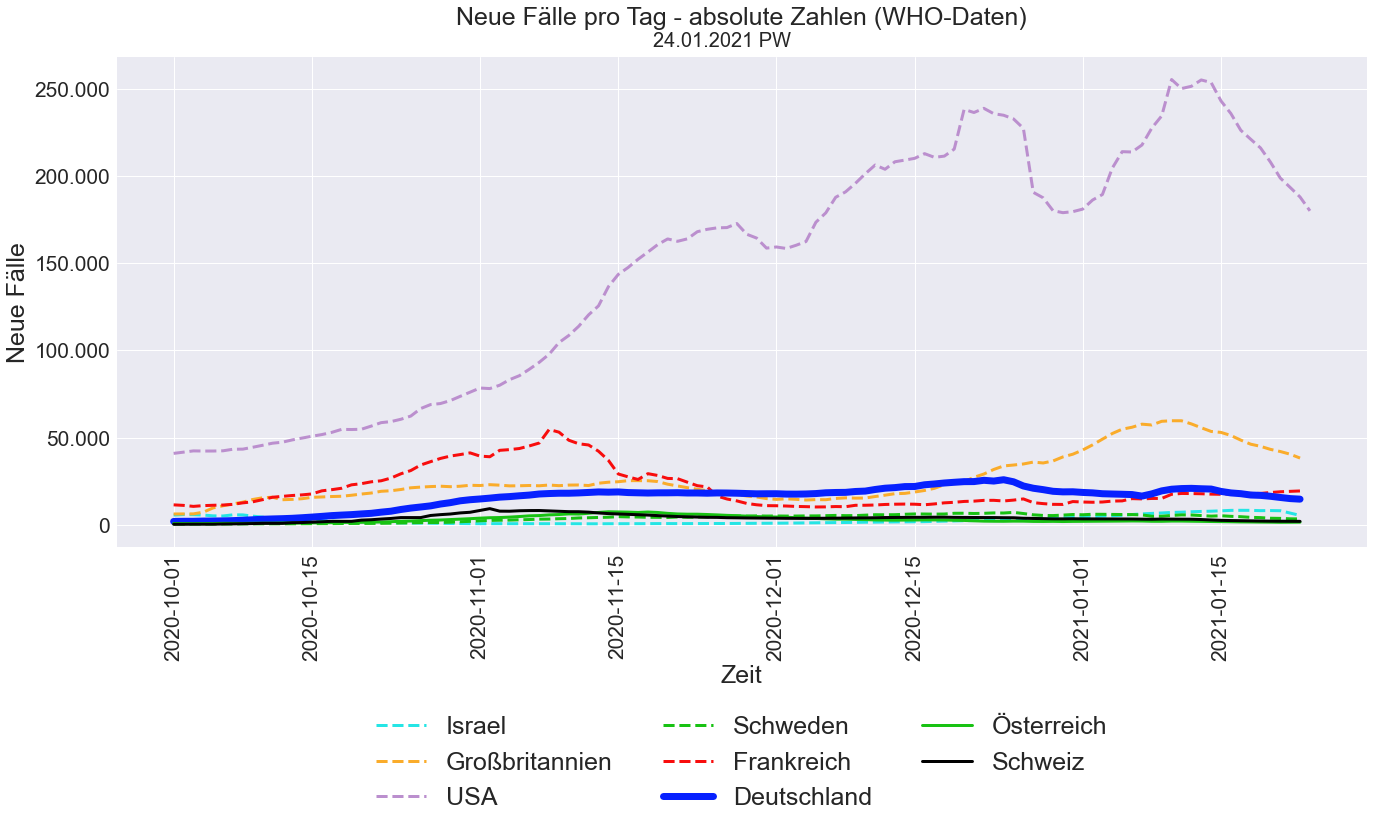

In [76]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16,9))

plt.style.use('seaborn')


def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig = plt.figure(figsize=(h,v))
ax = fig.add_subplot()
ax.yaxis.set_major_formatter(formatter)
#ax.xaxis.set_major_formatter(formatter)


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

# plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(pl.Date_reported,pl['MA'], color=c_pl, linestyle = 'dashed', linewidth = lws, label="Polen")
# plt.plot(cz.Date_reported,cz['MA'], color=c_cz, linestyle = 'dashed', linewidth = lws, label="Tschechien")
# plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'dashed', linewidth = lws, label="Schweiz")
# plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'dashed', linewidth = lws, label="Österreich")

plt.plot(isr.Date_reported,isr['MA'], color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
plt.plot(usa.Date_reported,usa['MA'], color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
plt.plot(se.Date_reported,se['MA'], color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 4, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - absolute Zahlen (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_1_1, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_1_1, dpi = dpi, bbox_inches='tight')

plt.show()
# plt.close()

# Visualisierung der Plots

### 1-1) Neue Fälle 7 Tage Mittelwert (absolute Zahlen)

In [77]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16,9))

plt.style.use('seaborn')


def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig = plt.figure(figsize=(h,v))
ax = fig.add_subplot()
ax.yaxis.set_major_formatter(formatter)



# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

# plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
# plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(pl.Date_reported,pl['MA'], color=c_pl, linestyle = 'dashed', linewidth = lws, label="Polen")
# plt.plot(cz.Date_reported,cz['MA'], color=c_cz, linestyle = 'dashed', linewidth = lws, label="Tschechien")
# plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'dashed', linewidth = lws, label="Schweiz")
# plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'dashed', linewidth = lws, label="Österreich")

plt.plot(isr.Date_reported,isr['MA'], color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
plt.plot(gb.Date_reported,gb['MA'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
plt.plot(usa.Date_reported,usa['MA'], color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
plt.plot(se.Date_reported,se['MA'], color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
plt.plot(fr.Date_reported,fr['MA'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
plt.plot(at.Date_reported,at['MA'], color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
plt.plot(ch.Date_reported,ch['MA'], color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - absolute Zahlen (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_1_1, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_1_1, dpi = dpi, bbox_inches='tight')

plt.close()

### 1-2) Neue Fälle 7 Tage Mittelwert (pro 100.000 Einwohner)

In [78]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(h,v))

plt.style.use('seaborn')


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

#plt.plot(cz.Date_reported,cz['MA']* (pE/E_cz), color=c_cz, linestyle = 'dashed', linewidth = lws, label="Tschechien")
# plt.plot(gb.Date_reported,gb['MA']* (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
# plt.plot(usa.Date_reported,usa['MA']* (pE/E_usa), color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
# plt.plot(isr.Date_reported,isr['MA']* (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
# plt.plot(se.Date_reported,se['MA']* (pE/E_se), color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
# plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
# plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")


plt.plot(isr.Date_reported,isr['MA']* (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
plt.plot(gb.Date_reported,gb['MA']* (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
plt.plot(usa.Date_reported,usa['MA']* (pE/E_usa), color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
plt.plot(se.Date_reported,se['MA']* (pE/E_se), color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
plt.plot(fr.Date_reported,fr['MA']* (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
plt.plot(ch.Date_reported,ch['MA']* (pE/E_ch), color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")
plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
plt.plot(at.Date_reported,at['MA']* (pE/E_at), color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")

plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)


# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - pro 100.000 Einwohner (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_1_2, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +   name_1_2, dpi = dpi, bbox_inches='tight')

plt.close()

###  3-1) Todesfälle 7 Tage Mittelwert (absolute Zahlen) 

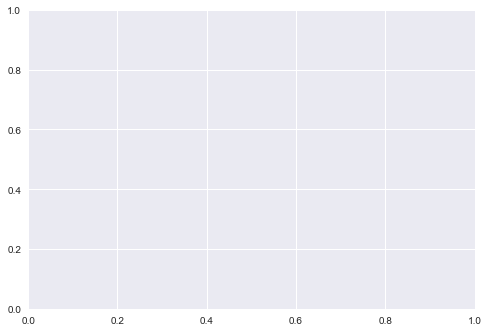

In [79]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16,9))

plt.style.use('seaborn')
plt.grid(True)

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig = plt.figure(figsize=(h,v))
ax = fig.add_subplot()
ax.yaxis.set_major_formatter(formatter)



# Todesfälle pro 100.000 Einwohner 02.12.2020
# plt.plot(ger.Date_reported,ger['MA_deaths'], color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland") # blau, linie, dick
# plt.plot(gb.Date_reported,gb['MA_deaths'], color=c_gb, linestyle = 'dashed', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
# plt.plot(fr.Date_reported,fr['MA_deaths'], color=c_fr, linestyle = 'dashed', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn
# plt.plot(pl.Date_reported,pl['MA_deaths'], color=c_pl, linestyle = 'dashed', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
# plt.plot(cz.Date_reported,cz['MA_deaths'], color=c_cz, linestyle = 'dashed', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
# plt.plot(at.Date_reported,at['MA_deaths'], color=c_at, linestyle = 'dashed', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
# plt.plot(ch.Date_reported,ch['MA_deaths'], color=c_ch, linestyle = 'dashed', linewidth = lws, label = "Schweiz") # schwarz, gestrichelt, dünn
# plt.plot(isr.Date_reported,isr['MA_deaths'], color=c_isr, linestyle = 'dashed', linewidth = lws, label = "Israel") # schwarz, gestrichelt, dünn


plt.plot(gb.Date_reported,gb['MA_deaths'], color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
plt.plot(ger.Date_reported,ger['MA_deaths'], color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
plt.plot(usa.Date_reported,usa['MA_deaths'], color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
plt.plot(fr.Date_reported,fr['MA_deaths'], color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
plt.plot(isr.Date_reported,isr['MA_deaths'], color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
plt.plot(se.Date_reported,se['MA_deaths'], color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")
plt.plot(at.Date_reported,at['MA_deaths'], color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
plt.plot(ch.Date_reported,ch['MA_deaths'], color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")


# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Todesfälle pro Tag - absolute Zahlen (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_3_1, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_3_1, dpi = dpi, bbox_inches='tight')

plt.close()

###  3-2) Todesfälle 7 Tage Mittelwert (pro 100.000 Einwohner) 

In [80]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(h,v))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020

# plt.plot(cz.Date_reported,cz['MA_deaths'] * (pE/E_cz), color=c_cz, linestyle = 'dashed', linewidth = lws, label = "Tschechien") # magenta, gestrichelt, dünn
# plt.plot(at.Date_reported,at['MA_deaths'] * (pE/E_at), color=c_at, linestyle = 'dashed', linewidth = lws, label = "Österreich") # grün, gestrichelt, dünn
# plt.plot(gb.Date_reported,gb['MA_deaths'] * (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label = "Großbritannien") # gelb, gestrichelt, dünn
# plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland") # blau, linie, dick
# plt.plot(ch.Date_reported,ch['MA_deaths'] * (pE/E_ch), color=c_ch, linestyle = 'dashed', linewidth = lws, label = "Schweiz") # schwarz, gestrichelt, dünn
# plt.plot(pl.Date_reported,pl['MA_deaths'] * (pE/E_pl), color=c_pl, linestyle = 'dashed', linewidth = lws, label = "Polen") # cyan, gestrichelt, dünn
# plt.plot(fr.Date_reported,fr['MA_deaths'] * (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label = "Frankreich") # rot, gestrichelt, dünn
# plt.plot(isr.Date_reported,isr['MA_deaths'] * (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label = "Israel") # rot, gestrichelt, dünn


plt.plot(gb.Date_reported,gb['MA_deaths']* (pE/E_gb), color=c_gb, linestyle = 'dashed', linewidth = lws, label="Großbritannien")
plt.plot(ger.Date_reported,ger['MA_deaths']* (pE/E_ger), color=c_ger, linestyle = 'solid', linewidth = lwb, label="Deutschland")
plt.plot(usa.Date_reported,usa['MA_deaths']* (pE/E_usa), color=c_usa, linestyle = 'dashed', linewidth = lws, label="USA")
plt.plot(ch.Date_reported,ch['MA_deaths']* (pE/E_ch), color=c_ch, linestyle = 'solid', linewidth = lws, label="Schweiz")
plt.plot(isr.Date_reported,isr['MA_deaths']* (pE/E_isr), color=c_isr, linestyle = 'dashed', linewidth = lws, label="Israel")
plt.plot(fr.Date_reported,fr['MA_deaths']* (pE/E_fr), color=c_fr, linestyle = 'dashed', linewidth = lws, label="Frankreich")
plt.plot(at.Date_reported,at['MA_deaths']* (pE/E_at), color=c_at, linestyle = 'solid', linewidth = lws, label="Österreich")
plt.plot(se.Date_reported,se['MA_deaths']* (pE/E_se), color=c_se, linestyle = 'dashed', linewidth = lws, label="Schweden")


# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Todesfälle pro Tag - pro 100.000 Einwohner (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_3_2, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +  name_3_2, dpi = dpi, bbox_inches='tight')

plt.close()

In [81]:
# ts = pd.to_datetime('2020-12-15', utc=True)
# #dataframe reduzieren 
# data = data.loc[data.Date_reported >= ts, :]
# ger = data[data.Country == 'Germany']

###  4-1) Cases 7 Tage Mittelwert Deutschland

In [82]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(h*1.4,v))

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)

fig = plt.figure(figsize=(h,v))
ax = fig.add_subplot()
ax.yaxis.set_major_formatter(formatter)


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
plt.plot(ger.Date_reported,ger['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)")
plt.plot(ger.Date_reported,ger['New_cases'], marker='.', linestyle='', color=c_ger, markersize = 20)
plt.plot(ger.Date_reported,ger['OTG_cases'], color='red', linestyle = 'dashed', linewidth = lws, label ="±1 sigma")
plt.plot(ger.Date_reported,ger['UTG_cases'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Neue Fälle pro Tag - Deutschland (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# fill area between lines
plt.fill_between(ger.Date_reported, ger['OTG_cases'], ger['UTG_cases'] , color='red',alpha=0.5)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_4_1, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +  name_4_1, dpi = dpi, bbox_inches='tight')

plt.close()

###  4-2) Deaths 7 Tage Mittelwert Deutschland

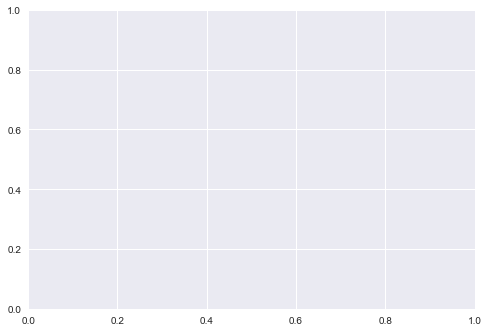

In [83]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
#plt.figure(figsize=(16,9))

plt.style.use('seaborn')
plt.grid(True)


def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig = plt.figure(figsize=(h,v))
ax = fig.add_subplot()
ax.yaxis.set_major_formatter(formatter)

# Todesfälle pro 100.000 Einwohner 02.12.2020

plt.plot(ger.Date_reported,ger['MA_deaths'], color=c_ger, linestyle = 'solid', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)") # blau, linie, dick
plt.plot(ger.Date_reported,ger['New_deaths'], marker='.', linestyle='', color=c_ger, markersize = 20)

plt.plot(ger.Date_reported,ger['OTG_deaths'], color='red', linestyle = 'dashed', linewidth = lws, label ="±1 sigma")
plt.plot(ger.Date_reported,ger['UTG_deaths'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Todesfälle pro Tag - Deutschland (WHO-Daten)\n', fontsize=size)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# fill area between lines
plt.fill_between(ger.Date_reported, ger['OTG_deaths'], ger['UTG_deaths'] , color='red',alpha=0.5)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output +  name_4_2, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive +  name_4_2, dpi = dpi, bbox_inches='tight')

plt.close()

## dataframes speichern

In [84]:
data.to_csv(Laufwerk + pfad_output + name_output_df, index=False)

ger.to_csv(Laufwerk + pfad_output + "\\Dataframes\\ger.csv", index=False)
fr.to_csv(Laufwerk + pfad_output + "\\Dataframes\\fr.csv", index=False)
at.to_csv(Laufwerk + pfad_output + "\\Dataframes\\at.csv", index=False)
pl.to_csv(Laufwerk + pfad_output + "\\Dataframes\\pl.csv", index=False)
cz.to_csv(Laufwerk + pfad_output + "\\Dataframes\\cz.csv", index=False)
ch.to_csv(Laufwerk + pfad_output + "\\Dataframes\\ch.csv", index=False)
it.to_csv(Laufwerk + pfad_output + "\\Dataframes\\it.csv", index=False)
es.to_csv(Laufwerk + pfad_output + "\\Dataframes\\es.csv", index=False)
gb.to_csv(Laufwerk + pfad_output + "\\Dataframes\\gb.csv", index=False)
isr.to_csv(Laufwerk + pfad_output + "\\Dataframes\\isr.csv", index=False)
se.to_csv(Laufwerk + pfad_output + "\\Dataframes\\se.csv", index=False)
usa.to_csv(Laufwerk + pfad_output + "\\Dataframes\\usa.csv", index=False)
spa.to_csv(Laufwerk + pfad_output + "\\Dataframes\\spa.csv", index=False)
ita.to_csv(Laufwerk + pfad_output + "\\Dataframes\\ita.csv", index=False)
rus.to_csv(Laufwerk + pfad_output + "\\Dataframes\\rus.csv", index=False)


## Performance messen

In [85]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 8.84 seconds
